# **`BUREAU_BALANCE`**

Caractéristiques :
* $27\,299\,925$ enregistrements.
* $3$ variables, dont $1$ **`SK`**, $1$ **`STATUS`**, $1$ **`MONTHS`**
* Aucun NA.

Cette table détaille, mois par mois, sur 97 mois, l'état des retards (éventuels) de paiement.

$54\,\%$ des clients sont ainsi suivis en détail, un degré de défaut de paiment.

Definition:
* Monthly balances of previous credits in Credit Bureau.
* This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

Définition :
* *Soldes mensuels des précédents crédits signalés au bureau de crédit.*
* *Cette table a une ligne pour chaque mois de l'historique de chaque crédit précédent signalé au bureau de crédit - c'est-à-dire que la table a (# prêts dans l'échantillon * # de crédits précédents relatifs * # de mois où nous avons une historique observable pour les crédits précédents) de lignes.*

In [2]:
from home_credit.load import get_bureau_balance
from home_credit.utils import display_frame_basic_infos
df = get_bureau_balance()
display_frame_basic_infos(df)
display(df)

n_samples: 27 299 925
n_columns: 3, [('SK', 1), ('MONTHS', 1), ('STATUS', 1)]


RAW_BUREAU_BALANCE,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


# Vue d'ensemble

## Données brutes

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
RAW_BUREAU_BALANCE,,,,,,
SK_ID_BUREAU,27299925,817395,0,1.000,0.030,int64
MONTHS_BALANCE,27299925,97,0,1.000,0.000,int64
STATUS,27299925,8,0,1.000,0.000,object


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/discrete_stats/discrete_stats_raw_bureau_balance_2023_04_19_10_02_35_506691.png)


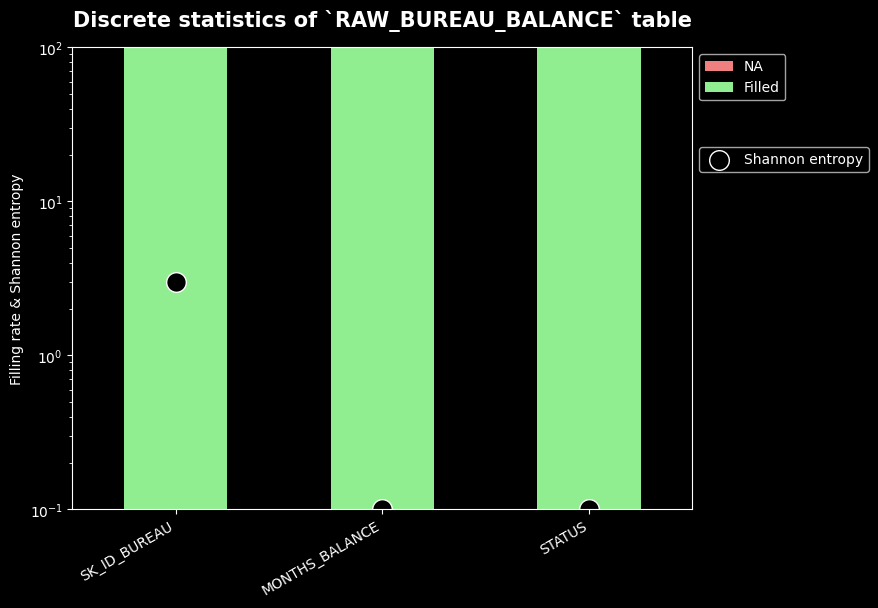

In [3]:
from pepper.utils import show_discrete_stats
show_discrete_stats(df)

## Signification

In [4]:
from home_credit.utils import help_cols
help_cols(df.columns)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\HomeCredit_columns_description.pqt


Table|Column|Description|Special|
---|---|---|---|
bureau|SK_ID_BUREAU|Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)|hashed|
bureau_balance|SK_ID_BUREAU|Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table |hashed|
bureau_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|
bureau_balance|STATUS|Status of Credit Bureau loan during the month (active, closed, DPD0-30,� [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,� 5 means DPD 120+ or sold or written off ] )|_|
pos_cash_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )|time only relative to the application|
credit_card_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|

# `SK_ID_BUREAU`

La première chose à vérifier est la relation par l'intermédiaire de cette clé entre les tables `bureau` et `bureau_balance`.

Le fait que $942\,074$ ($54\,\%$ des) clients suivis dans `bureau` n'aient pas de détails fournis dans `bureau_balance` n'est pas fondamentalement un problème, *quoiqu'il faudrait en dériver un indicateur en extension de la table `bureau`*.

⚠ En revanche, le fait que $43\,041$ ($2.4\,\%$ des) clients aient des détails dans `bureau_balance` alors qu'ils ne sont pas enregistrés dans `bureau` en est un. Nous avons des informations inutiles puisqu'elles ne peuvent être rattachées à personne. Elles peuvent au mieux avoir un intérêt statistique en tant que données anonymisées pour peu que l'on fasse confiance à la méthode d'échantillonnage.

Il faudra notamment en tenir compte au moment de joindre les deux tables.

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau.pqt
save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/corr/pk_sk_id_bureau_relationship__is_in_a_but_not_in_b_2023_04_19_10_52_17_731586.png)


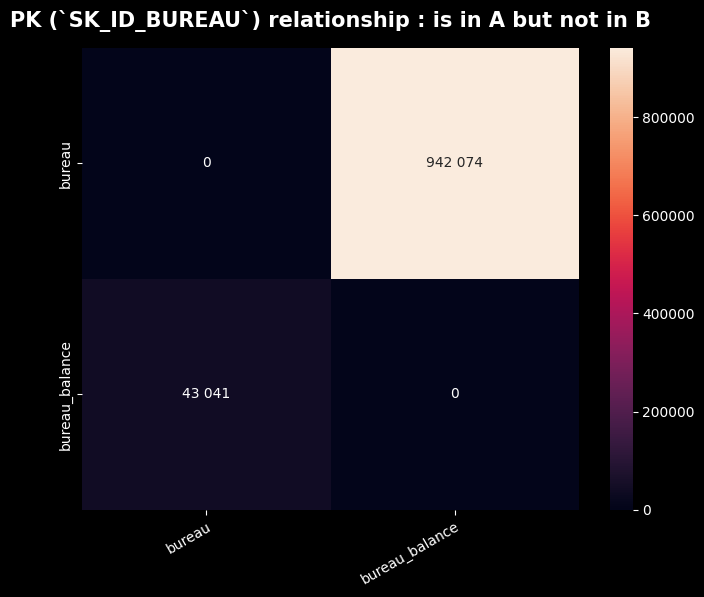

save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/corr/pk_sk_id_bureau_relationship__is_in_a_but_not_in_b_2023_04_19_10_52_19_183509.png)


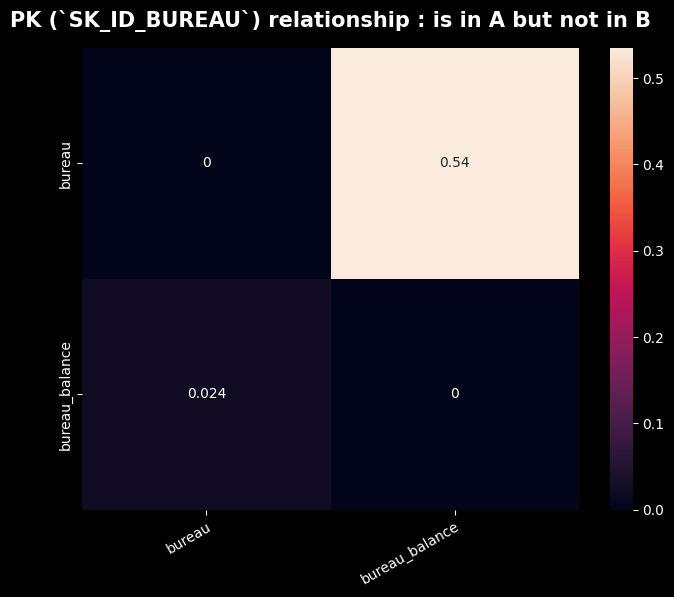

In [5]:
from home_credit.load import get_bureau, get_bureau_balance
from pepper.db_utils import display_is_in_A_but_not_in_B_heatmap

key = "SK_ID_BUREAU"
table_dict = {
    "bureau": get_bureau(),
    "bureau_balance": get_bureau_balance()
}
_ = display_is_in_A_but_not_in_B_heatmap(table_dict, key)
_ = display_is_in_A_but_not_in_B_heatmap(table_dict, key, True)

Formons les deux listes de ces *électrons libres*, elles nous seront utiles par la suite :

In [2]:
from home_credit.load import get_bureau, get_bureau_balance
from pepper.utils import display_key_val
import numpy as np

sk = "SK_ID_BUREAU"
main = get_bureau
subs = get_bureau_balance

main_unique_sk = main()[sk].drop_duplicates()
display_key_val("# main_unique_sk", main_unique_sk.size)
subs_unique_sk = subs()[sk].drop_duplicates()
display_key_val("# subs_unique_sk", subs_unique_sk.size)

only_main_unique_sk = np.setdiff1d(main_unique_sk, subs_unique_sk, assume_unique=True)
display_key_val("# only_main_unique_sk", only_main_unique_sk.size)
only_subs_unique_sk = np.setdiff1d(subs_unique_sk, main_unique_sk, assume_unique=True)
display_key_val("# only_subs_unique_sk", only_subs_unique_sk.size)

# main_unique_sk: 1 716 428
# subs_unique_sk: 817 395
# only_main_unique_sk: 942 074
# only_subs_unique_sk: 43 041


# `STATUS`

Variable catégorielle.

* $21\,\%$ de NA cachés sous le code `X`.
* $50\,\%$ de prêt clôturés, code `C`, ce qui est une proportion importante et pose question.
* $27\,\%$ de cas sans problème particulier.
* $12\,\%$ distribués sur 5 classes de défauts de paiment :
    * $9\,\%$ en classe `1` - Défaut maximum atteint dans les 30 derniers jours
    * $1\,\%$ en classe `2` - Défaut maximum atteint le mois précédent
    * $\varepsilon$ en classe `3` - Défaut maximum atteint il y a deux mois
    * $\varepsilon$ en classe `4` - Défaut maximum atteint il y a trois mois
    * $2\,\%$ en classe `5` - Défaut maximum atteint il y a plus de 4 mois, ou bien a été vendu, ou radié en tant que dette irrécouvrable

On lit entre les lignes qu'en cas de défaut, soit le recouvrement intervient très rapidement, le mois suivant et que la situation se régularise, ou bien qu'elle ne se régularise pas (les $\varepsilon$ sur 3 et 4).

Il est peu probable qu'un client en situation 5 obtienne un prêt.

En l'état, nous visualisons la distribution des événements mensuels, mais pas la distribution de ces états par client. La table bureau ne devient intéressante qu'après pivotement des mois en colonnes.

## Données

In [7]:
from home_credit.load import get_bureau_balance
from home_credit.utils import get_datablock
from pepper.univar import agg_value_counts
bur_bal = get_bureau_balance()
data_block = get_datablock(bur_bal, "STATUS")
display(agg_value_counts(data_block.STATUS, agg=None, dropna=False))

,count,proportion
STATUS,,
C,13646993,0.500
0,7499507,0.275
X,5810482,0.213
1,242347,0.009
5,62406,0.002
2,23419,0.001
3,8924,0.000
4,5847,0.000


## Distribution des classes


STATUS


Table|Column|Description|Special|
---|---|---|---|
bureau_balance|STATUS|Status of Credit Bureau loan during the month (active, closed, DPD0-30,� [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,� 5 means DPD 120+ or sold or written off ] )|_|

,count,proportion
STATUS,,
1,242347,0.707
5,62406,0.182
2,23419,0.068
3,8924,0.026
4,5847,0.017


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/dataxplor/cat_modalities_counts_status_2023_04_18_15_12_29_534637.png)


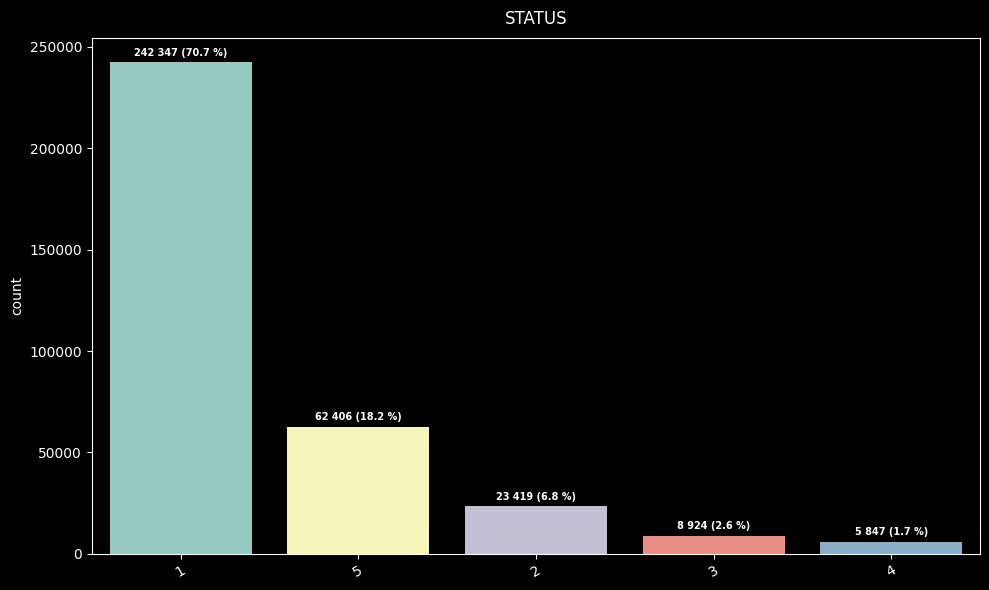

In [8]:
from home_credit.utils import datablock_catdist_report
y = data_block[~data_block.STATUS.isin(["C", "0", "X"])]
datablock_catdist_report(y)

# `MONTHS_BALANCE`

Avant de procéder au pivotement des mois en tant qu'index de colonnes, analysons rapidement cette variable.

## Données

In [9]:
from home_credit.load import get_bureau_balance
from home_credit.utils import get_datablock
from pepper.univar import agg_value_counts
bur = get_bureau_balance()
data_block = get_datablock(bur, "MONTHS_BALANCE")
display(agg_value_counts(data_block.MONTHS_BALANCE, agg=None, dropna=False))

,count,proportion
MONTHS_BALANCE,,
-1,622601,0.023
-2,619243,0.023
-3,615080,0.023
0,610965,0.022
-4,609138,0.022
...,...,...
-92,57300,0.002
-93,53535,0.002
-94,49965,0.002


## Distribution des classes

On observe une décroissance linéaire du nombre d'information en fonction du nombre de mois.

Une exception pour le 0, non mentionné dans la définition, situé entre -3 et -4.

Cela s'explique probablement par le fait que les données du mois en cours sont partiellement actualisées.


MONTHS_BALANCE


Table|Column|Description|Special|
---|---|---|---|
bureau_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|
pos_cash_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )|time only relative to the application|
credit_card_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|

,count,proportion
MONTHS_BALANCE,,
-1,622601,0.023
-2,619243,0.023
-3,615080,0.023
0,610965,0.022
-4,609138,0.022
...,...,...
-92,57300,0.002
-93,53535,0.002
-94,49965,0.002


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/dataxplor/cat_modalities_counts_months_balance_2023_04_18_15_12_44_546750.png)


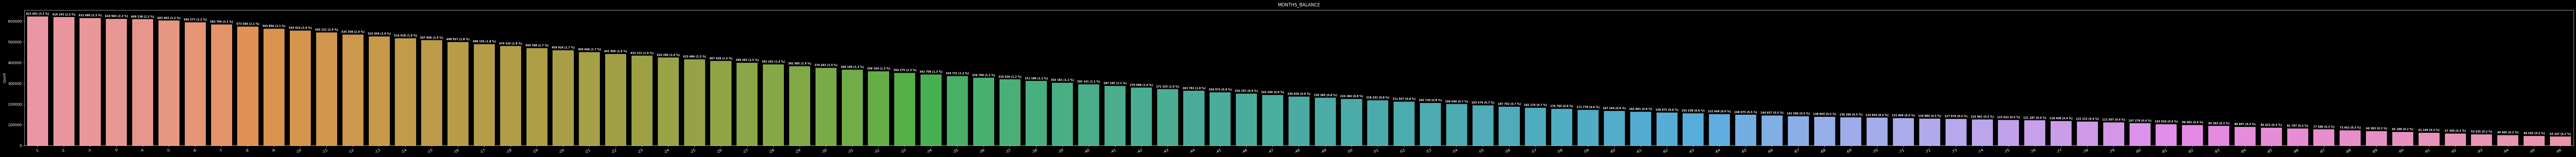

In [10]:
from home_credit.utils import datablock_catdist_report
datablock_catdist_report(data_block)

# Pivotement des mois en colonnes

Avec un coût de pivotement de 20 secondes avec création d'une matrice relativement creuse (apparition de nombreux NA), nous ne le ferons qu'une fois, ici, pour la visualisation.

**NB** Un `groupby` n'est pas adapté à l'opération à effectuer, il prendrait un temps considérable.

In [11]:
from home_credit.load import get_bureau_balance
bur_bal = get_bureau_balance().copy()
bur_bal.MONTHS_BALANCE = -bur_bal.MONTHS_BALANCE
pivoted = bur_bal.pivot(index="SK_ID_BUREAU", columns="MONTHS_BALANCE", values="STATUS")
display(pivoted)

MONTHS_BALANCE,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
SK_ID_BUREAU,,,,,,,,,,,,,,,,,,,,,
5001709,C,C,C,C,C,C,C,C,C,C,...,X,X,X,X,X,X,X,X,X,X
5001710,C,C,C,C,C,C,C,C,C,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5001711,X,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5001712,C,C,C,C,C,C,C,C,C,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5001713,X,X,X,X,X,X,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6842884,C,C,C,C,C,C,C,C,C,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6842885,5,5,5,5,5,5,5,5,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6842886,C,C,C,C,C,C,C,C,C,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La représentation suivante est tout aussi informative et plus lisible (Run-Length encoding (RLE)) qui est une technique élémentaire de compression.

L'opération est un peu longue, 2 minutes, mais elle est une densification utile de l'information.

In [12]:
from pepper.feat_eng import row_rle
red = pivoted.apply(row_rle, axis=1)
display(red)

SK_ID_BUREAU
5001709                                   [[C, 86], [X, 11]]
5001710    [[C, 48], [0, 1], [X, 1], [0, 4], [X, 29], [na...
5001711                          [[X, 1], [0, 3], [nan, 93]]
5001712                         [[C, 9], [0, 10], [nan, 78]]
5001713                                 [[X, 22], [nan, 75]]
                                 ...                        
6842884        [[C, 20], [X, 18], [0, 9], [X, 1], [nan, 49]]
6842885                        [[5, 12], [0, 12], [nan, 73]]
6842886                         [[C, 25], [0, 8], [nan, 64]]
6842887                         [[C, 31], [0, 6], [nan, 60]]
6842888         [[C, 52], [0, 6], [1, 1], [0, 3], [nan, 35]]
Length: 817395, dtype: object

Dans la mesure où de nombreux prêts sont clôturés et que l'actualisation mensuelle consiste seulement à ajouter des `C`, que les NA se concentrent sur la fin (nous n'avons certes pas vérifiés que certains se cacheraient au milieu), nous allons distribuer cela en 4 colonnes :
* une première colonne qui compte depuis combien de mois le prêt est clôturé, soit 86, 48, 0, 9, .. dans l'exemple ci-dessus,
* une consonde colonne qui indiquer le nombre de mois de la fenêtre de suivi effectif,
* une troisième colonne qui compte le nombre de mois de padding sans suivi, qui permet de déduire par 97 - cette valeur, depuis combien de mois le prêt est suivi,
* une dernière colonne qui contient la véritable séquence active au format RLE.

In [13]:
from home_credit.feat_eng import divide_rle
print(divide_rle(red.loc[5001709]))

(86, 11, 0, (('X', 11),))


In [14]:
from home_credit.feat_eng import divide_rle
divided = red.apply(divide_rle)
display(divided)

SK_ID_BUREAU
5001709                            (86, 11, 0, ((X, 11),))
5001710    (48, 35, 14, ((0, 1), (X, 1), (0, 4), (X, 29)))
5001711                       (0, 4, 93, ((X, 1), (0, 3)))
5001712                            (9, 10, 78, ((0, 10),))
5001713                            (0, 22, 75, ((X, 22),))
                                ...                       
6842884            (20, 28, 49, ((X, 18), (0, 9), (X, 1)))
6842885                    (0, 24, 73, ((5, 12), (0, 12)))
6842886                             (25, 8, 64, ((0, 8),))
6842887                             (31, 6, 60, ((0, 6),))
6842888             (52, 10, 35, ((0, 6), (1, 1), (0, 3)))
Length: 817395, dtype: object

In [15]:
import pandas as pd
dense_bur_bal = pd.DataFrame.from_records(
    divided.values,
    index=divided.index,
    columns=["CLOSED", "TRACKED", "NOTRACK", "PROFILE"]
)
display(dense_bur_bal)

,CLOSED,TRACKED,NOTRACK,PROFILE
SK_ID_BUREAU,,,,
5001709,86,11,0,"((X, 11),)"
5001710,48,35,14,"((0, 1), (X, 1), (0, 4), (X, 29))"
5001711,0,4,93,"((X, 1), (0, 3))"
5001712,9,10,78,"((0, 10),)"
5001713,0,22,75,"((X, 22),)"
...,...,...,...,...
6842884,20,28,49,"((X, 18), (0, 9), (X, 1))"
6842885,0,24,73,"((5, 12), (0, 12))"
6842886,25,8,64,"((0, 8),)"


Les `X` représentent le non suivi interne et il vient ponctuer la séquence de suivi actif.

On peut envisager un strip sur les extrémités, une interpolation lorsqu'il est isolé au milieu d'une séquence constante, etc.

La compression que nous avons effectuée permet également de dériver rapidement des indices (ratios de mois dans chaque classe de défaut, sur l'ensemble des mois suivis) que nous aurions pu obtenir plus directement mais en perdant le contexte de la séquence, laquelle *conte une histoire*.